# Best Subset Selection

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm
from itertools import combinations
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

%matplotlib inline
plt.style.use('ggplot')

In [2]:
hitters = pd.read_csv('./Downloads/Hitters.csv', index_col=0)
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

In [3]:
hitters.isnull().sum().sum()

59

In [4]:
hitters.dropna(inplace=True)
hitters.isnull().values.any()

False

In [5]:
hitters_df = pd.get_dummies(hitters, drop_first=True)
hitters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    int64  
 1   Hits         263 non-null    int64  
 2   HmRun        263 non-null    int64  
 3   Runs         263 non-null    int64  
 4   RBI          263 non-null    int64  
 5   Walks        263 non-null    int64  
 6   Years        263 non-null    int64  
 7   CAtBat       263 non-null    int64  
 8   CHits        263 non-null    int64  
 9   CHmRun       263 non-null    int64  
 10  CRuns        263 non-null    int64  
 11  CRBI         263 non-null    int64  
 12  CWalks       263 non-null    int64  
 13  PutOuts      263 non-null    int64  
 14  Assists      263 non-null    int64  
 15  Errors       263 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_N     263 non-null    uint8  
 18  Division_W   263 non-null    uint8

In [6]:
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [7]:
def best_subset(df, max_feats=8):
    preds = df.drop('Salary', axis=1)

    def lin_mod(features):
        X = sm.add_constant(df[features])
        y = df['Salary']
        
        est = sm.OLS(y, X).fit()

        return est, est.ssr

    def best_model(k):
        results = []
        for combo in combinations(preds, k):
            results.append(lin_mod(list(combo)))

        return sorted(results, key=itemgetter(1)).pop(0)[0]

    models = []
    for k in tqdm(range(1, max_feats+1)):
        models.append(best_model(k))
        
    return models

In [8]:
models = best_subset(hitters_df)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [06:25<00:00, 48.13s/it]


In [9]:
for model in models:
    print(model.model.df_model, model.model.exog_names[1:])

1.0 ['CRBI']
2.0 ['Hits', 'CRBI']
3.0 ['Hits', 'CRBI', 'PutOuts']
4.0 ['Hits', 'CRBI', 'PutOuts', 'Division_W']
5.0 ['AtBat', 'Hits', 'CRBI', 'PutOuts', 'Division_W']
6.0 ['AtBat', 'Hits', 'Walks', 'CRBI', 'PutOuts', 'Division_W']
7.0 ['Hits', 'Walks', 'CAtBat', 'CHits', 'CHmRun', 'PutOuts', 'Division_W']
8.0 ['AtBat', 'Hits', 'Walks', 'CHmRun', 'CRuns', 'CWalks', 'PutOuts', 'Division_W']


In [10]:
models_full = best_subset(hitters_df, 19)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [24:40<00:00, 77.94s/it]


In [11]:
for model in models_full:
    print(model.model.df_model, model.model.exog_names[1:])

1.0 ['CRBI']
2.0 ['Hits', 'CRBI']
3.0 ['Hits', 'CRBI', 'PutOuts']
4.0 ['Hits', 'CRBI', 'PutOuts', 'Division_W']
5.0 ['AtBat', 'Hits', 'CRBI', 'PutOuts', 'Division_W']
6.0 ['AtBat', 'Hits', 'Walks', 'CRBI', 'PutOuts', 'Division_W']
7.0 ['Hits', 'Walks', 'CAtBat', 'CHits', 'CHmRun', 'PutOuts', 'Division_W']
8.0 ['AtBat', 'Hits', 'Walks', 'CHmRun', 'CRuns', 'CWalks', 'PutOuts', 'Division_W']
9.0 ['AtBat', 'Hits', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Division_W']
10.0 ['AtBat', 'Hits', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Division_W']
11.0 ['AtBat', 'Hits', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'League_N', 'Division_W']
12.0 ['AtBat', 'Hits', 'Runs', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'League_N', 'Division_W']
13.0 ['AtBat', 'Hits', 'Runs', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W']
14.0 ['AtBat', 'Hits', 'HmRun', '

In [12]:
RSS, BIC, AIC, R2_adj = [], [], [], []
for model in models_full:
    RSS.append(model.ssr)
    BIC.append(model.bic)
    AIC.append(model.aic)
    R2_adj.append(model.rsquared_adj)

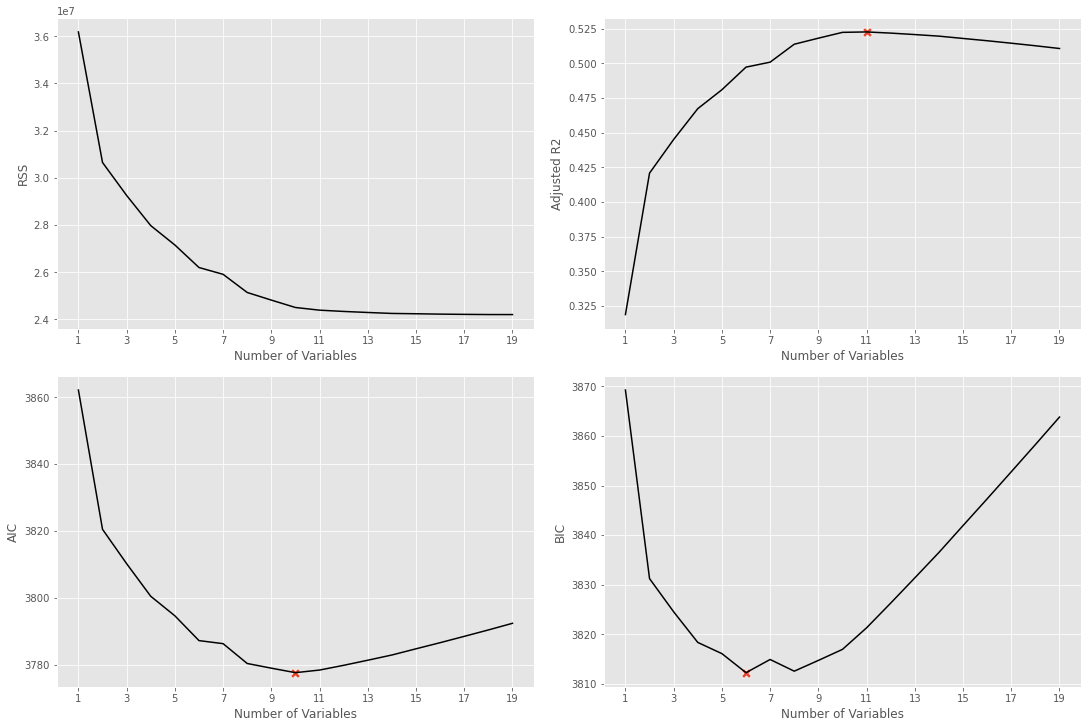

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

R2_adj_max, R2_adj_max_ind = max(R2_adj), R2_adj.index(max(R2_adj))
AIC_min_ind, AIC_min = min(enumerate(AIC), key=itemgetter(1))
BIC_min_ind, BIC_min = min(enumerate(BIC), key=itemgetter(1))

for y_ax, y_label, axis, point in zip([RSS, R2_adj, AIC, BIC], ['RSS', 'Adjusted R2', 'AIC', 'BIC'],
                                      [axes[0, 0], axes[0, 1],
                                          axes[1, 0], axes[1, 1]],
                                      [0, (R2_adj_max_ind, R2_adj_max), (AIC_min_ind, AIC_min), (BIC_min_ind, BIC_min)]):
    sns.lineplot(x=range(1, 20), y=y_ax, ax=axis, color='k')

    if y_label != 'RSS':
        sns.scatterplot(x=[point[0]+1], y=point[1], ax=axis, s=100, marker='X')
                                      
    axis.set_xticks(range(1, 20, 2))
    axis.set_xlabel('Number of Variables', fontsize=12)
    axis.set_ylabel(y_label, fontsize=12)

plt.show()

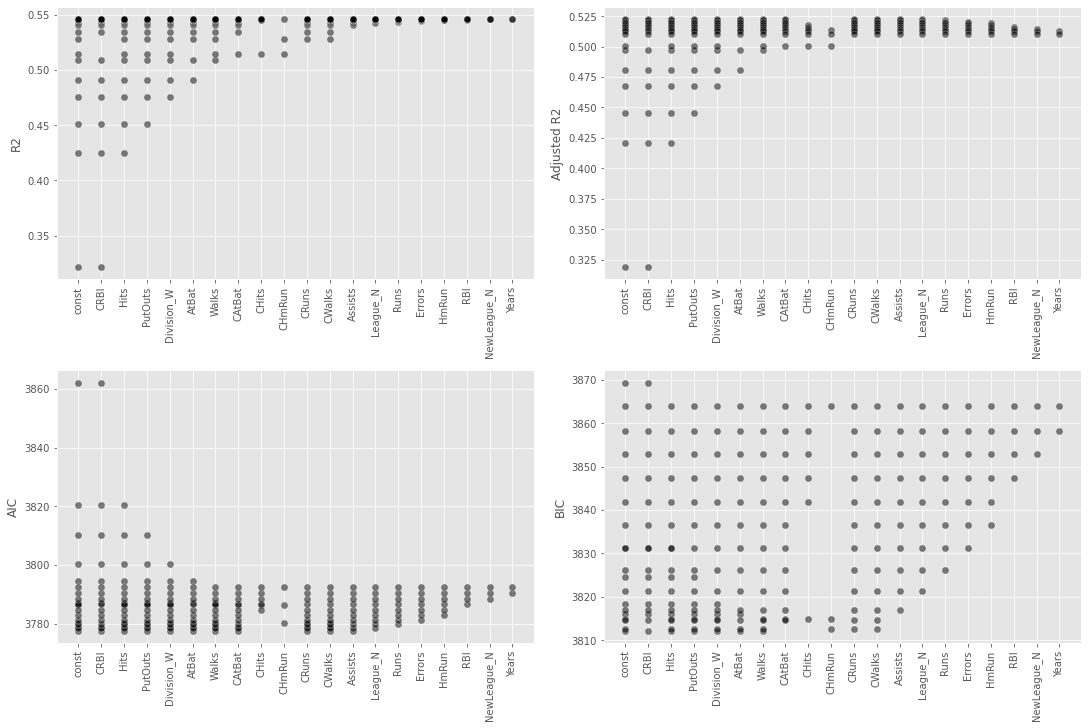

In [14]:
fig, axes = plt.subplots(2,2, figsize=(15, 10), constrained_layout=True)

for model in models_full:
    sns.scatterplot(x=model.model.exog_names, y=model.rsquared, s=50, color='k', alpha=.5, ax=axes[0, 0])
    sns.scatterplot(x=model.model.exog_names, y=model.rsquared_adj, s=50, color='k', alpha=.5, ax=axes[0, 1])
    sns.scatterplot(x=model.model.exog_names, y=model.aic, s=50, color='k', alpha=.5, ax=axes[1, 0])
    sns.scatterplot(x=model.model.exog_names, y=model.bic, s=50, color='k', alpha=.5, ax=axes[1, 1])

for y_label, axis in zip(('R2', 'Adjusted R2', 'AIC', 'BIC'), 
                (axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1])):
    axis.tick_params(axis='x', labelrotation = 90)
    axis.set_ylabel(y_label, fontsize=12)
    
plt.show()

In [15]:
models_full[5].params

const          91.511798
AtBat          -1.868589
Hits            7.604398
Walks           3.697647
CRBI            0.643017
PutOuts         0.264308
Division_W   -122.951534
dtype: float64

# Forward and Backward Stepwise Selection

In [16]:
def forward_stepwise(df, preds, y, results=[([], 0)]):
    preds_used = results[-1][0]
    preds_unused = [pred for pred in preds if pred not in preds_used]

    if not preds_unused:
        return results[1:]

    res = []
    for pred in preds_unused:
        feats = [pred]+preds_used
        X = sm.add_constant(df[feats])
        est = sm.OLS(y, X).fit()
        res.append((feats, est))

    results.append(sorted(res, key=lambda r: r[1].ssr).pop(0))

    return forward_stepwise(df, preds, y, results)

In [17]:
models_fwd = forward_stepwise(hitters_df, hitters_df.drop('Salary', axis=1).columns, hitters_df['Salary'])

In [18]:
for model in models_fwd:
    print(model[1].model.df_model, model[1].model.exog_names[1:])

1.0 ['CRBI']
2.0 ['Hits', 'CRBI']
3.0 ['PutOuts', 'Hits', 'CRBI']
4.0 ['Division_W', 'PutOuts', 'Hits', 'CRBI']
5.0 ['AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
6.0 ['Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
7.0 ['CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
8.0 ['CRuns', 'CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
9.0 ['CAtBat', 'CRuns', 'CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
10.0 ['Assists', 'CAtBat', 'CRuns', 'CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
11.0 ['League_N', 'Assists', 'CAtBat', 'CRuns', 'CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
12.0 ['Runs', 'League_N', 'Assists', 'CAtBat', 'CRuns', 'CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
13.0 ['Errors', 'Runs', 'League_N', 'Assists', 'CAtBat', 'CRuns', 'CWalks', 'Walks', 'AtBat', 'Division_W', 'PutOuts', 'Hits', 'CRBI']
14.0 ['HmRun', 'Errors', 'Runs', 'Lea

In [19]:
def backward_stepwise(df, preds, y, results=[]):
    if not results:
        X = sm.add_constant(df[preds])
        est = sm.OLS(y, X).fit()
        return backward_stepwise(df, preds, y, [(list(preds), est)])
    else:
        preds_used = results[-1][0]
        
    if len(preds_used) == 1:
        return results
    
    res = []
    for p in preds_used:
        feats = [pred for pred in preds_used if pred != p]
        X = sm.add_constant(df[feats])
        est = sm.OLS(y, X).fit()
        res.append((feats, est))
 
    results.append(sorted(res, key=lambda r: r[1].ssr).pop(0))
    
    return backward_stepwise(df, preds, y, results)

In [20]:
models_bwd = backward_stepwise(hitters_df, hitters_df.drop('Salary', axis=1).columns, hitters_df['Salary'])

In [21]:
for model in models_bwd:
    print(model[1].model.df_model, model[1].model.exog_names[1:])

19.0 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
18.0 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
17.0 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
16.0 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W']
15.0 ['AtBat', 'Hits', 'HmRun', 'Runs', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W']
14.0 ['AtBat', 'Hits', 'HmRun', 'Runs', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Div

In [22]:
models_fwd[6][1].params

const         109.787306
CWalks         -0.305307
Walks           4.913140
AtBat          -1.958885
Division_W   -127.122393
PutOuts         0.253340
Hits            7.449877
CRBI            0.853762
dtype: float64

In [23]:
models_bwd[-7][1].params

const         105.648749
AtBat          -1.976284
Hits            6.757491
Walks           6.055869
CRuns           1.129309
CWalks         -0.716335
PutOuts         0.302885
Division_W   -116.169217
dtype: float64

# Choosing Among Models Using the Validation Set

In [26]:
np.random.seed(1)

index = np.random.choice([True, False], size=hitters_df.shape[0])

train, test = hitters_df[index], hitters_df[~index]

In [27]:
models_best = best_subset(train, 19)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [20:57<00:00, 66.18s/it]


In [28]:
mse = []
for model in models_best:
    feats = model.model.exog_names[1:]
    pred = model.predict(sm.add_constant(test[feats]))
    mse.append(mean_squared_error(test['Salary'], pred))
print(*zip(range(1, 20), mse), sep='\n')

(1, 166035.84549277302)
(2, 142092.39385883862)
(3, 135858.502928824)
(4, 149145.71529971244)
(5, 157081.93033478677)
(6, 151618.21050902212)
(7, 144090.1566319442)
(8, 149447.58263116406)
(9, 142041.95425394105)
(10, 149422.51709356075)
(11, 145058.19060783755)
(12, 148414.3265654414)
(13, 153374.60073843464)
(14, 152454.49647719905)
(15, 150814.70559325238)
(16, 153460.665109441)
(17, 153345.15603933326)
(18, 152418.990077354)
(19, 152263.94200235713)


In [29]:
min_ind, min_val = min(enumerate(mse), key=itemgetter(1))
min_ind, min_val

(2, 135858.502928824)

In [30]:
models_best[min_ind].params

const         133.938530
Runs            4.905929
CRBI            0.501988
Division_W   -121.301760
dtype: float64

In [31]:
models_best_all = best_subset(hitters_df, 19)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [25:04<00:00, 79.19s/it]


In [32]:
mse = []
for model in models_best:
    feats = model.model.exog_names[1:]
    pred = model.predict(sm.add_constant(hitters_df[feats]))
    mse.append(mean_squared_error(hitters_df['Salary'], pred))
print(*zip(range(1, 20), mse), sep='\n')

(1, 143928.35202633354)
(2, 123887.29042765782)
(3, 118901.60932826439)
(4, 124700.26168693123)
(5, 126125.64885116763)
(6, 121570.45709384038)
(7, 117267.63233589633)
(8, 119645.3368163162)
(9, 115259.31837014247)
(10, 118743.46909971125)
(11, 116062.37945254776)
(12, 117436.74587227327)
(13, 119752.2303567133)
(14, 119229.65876244733)
(15, 118305.36695052047)
(16, 119641.44337397485)
(17, 119551.24629614681)
(18, 119065.04114041153)
(19, 118983.48334641551)


In [33]:
min_ind, min_val = min(enumerate(mse), key=itemgetter(1))
min_ind, min_val

(8, 115259.31837014247)

In [34]:
models_best_all[min_ind].params

const         146.249600
AtBat          -1.936768
Hits            6.656721
Walks           5.552044
CAtBat         -0.099539
CRuns           1.250671
CRBI            0.661768
CWalks         -0.777985
PutOuts         0.277731
Division_W   -115.349501
dtype: float64

In [35]:
models_best_all[2].params

const     -71.459220
Hits        2.803816
CRBI        0.682528
PutOuts     0.273581
dtype: float64

In [36]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=2)
mse = np.zeros([10, 19])

fold = 0
for train_ind, test_ind in kf10.split(hitters_df):
    df_train, df_test = hitters_df.iloc[train_ind], hitters_df.iloc[test_ind]
    
    models = best_subset(df_train, 19)
    for ind, model in enumerate(models):
        feats = model.model.exog_names[1:]
        pred = model.predict(sm.add_constant(df_test[feats]))
        mse[fold, ind] = mean_squared_error(df_test['Salary'], pred)
    
    fold += 1

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [24:46<00:00, 78.22s/it]


In [37]:
MSE = pd.DataFrame(np.mean(mse, axis=0), columns=['MSE'], index=range(1, 20))
MSE

,MSE
1,149906.551625
2,129420.026625
3,140291.834697
4,135994.820523
5,136409.147382
6,125420.699997
7,127578.926583
8,113615.237824
9,114814.107609
10,112175.133407


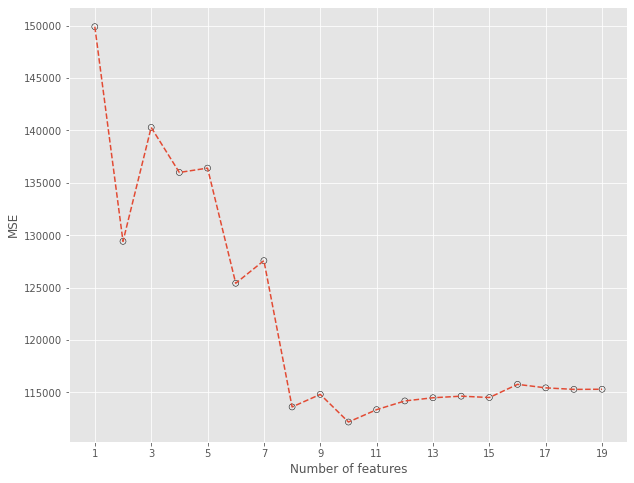

In [38]:
plt.figure(figsize=(10, 8))

sns.lineplot(x=MSE.index, y=MSE.squeeze(), linestyle='--')
sns.scatterplot(x=MSE.index, y=MSE.squeeze(), facecolor='none', edgecolor='k')

plt.xticks(range(1, 20, 2))
plt.xlabel('Number of features')

plt.show()

In [39]:
models_best_all[MSE.idxmin().squeeze()].params

const         135.751219
AtBat          -2.127748
Hits            6.923699
Walks           5.620276
CAtBat         -0.138991
CRuns           1.455331
CRBI            0.785253
CWalks         -0.822856
PutOuts         0.289409
Assists         0.268828
League_N       43.111615
Division_W   -111.146025
dtype: float64